In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jupyter as j
import importlib
importlib.reload(j)

import matplotlib.ticker as ticker
import glob

custom jupyter @DanielRobinson
custom jupyter @DanielRobinson


In [2]:
def attdt():
    atf = {}
    atten = np.arange(0, 50, 10)
    for at in atten:
        atf[str(at) + ' dB'] = []
    atf['50-110 dB'] = []
    return atf

In [3]:
# files = []
# files.append(['release/release1/*','release/release16/*','release/release64/*','release/release128/*','release/release256/*','release/release512/*', 'release/release0/*'])
# # files.append(['echo/deregister/*', 'echo/e/*', 'echo/echo/*', 'echo/register/*'])
# # files.append(['cops/delay/*', 'cops/deregister/*', 'cops/release/*', 'cops/tensec/*'])
# # files.append(['drx/cap/*'])
# # files.append(['ptau/capture/*'])
# files = sum(files, [])
# print(files)

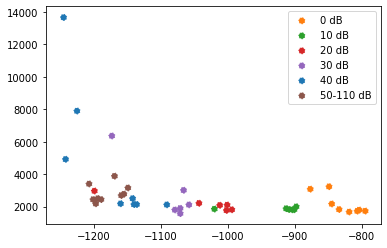

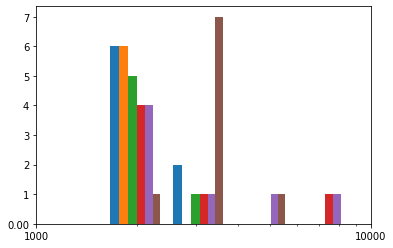

In [4]:
cc = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:blue', 'tab:brown']

dirr = 'logs/zte_mtn/rf_shield/ublox/'
# dirr = 'logs/nokia_vodacom/centurycity/quectel/'
# dirr = 'logs/nokia_vodacom/centurycity/ublox/'
# dirr = 'logs/nokia_vodacom/centurycity/quectel/'

atf = attdt()
atten = np.arange(110, -1, -10)
starfolder = 'release/release128/*'
subfiles = glob.glob(dirr + starfolder)
for file in subfiles:
    f = file.split('\\')[-1]
    for atn in atten:
        if str(atn) in f:
            # print(atn, file)
            if atn >= 50:
                atf['50-110 dB'].append(file)
            else:
                atf[str(atn) + ' dB'].append(file)
            break
    else:
        print('else', file)
        atf['50-110 dB'].append(file)

####################### scatter #######################
atd = attdt()
for k in atf:
    # print(k, atf[k])
    for f in atf[k]:
        c = j.csvToDict(f)
        dp = j.dataProcess(c)
        atd[k].append(dp)
    atd[k] = j.merge(atd[k])
    # print('atd[k]', len(atd[k]))

ky = 'txTime'
kx = 'Signal power'

y = []
x = []
ka = []

for i, k in enumerate(atd):
    ka.append(k)
    x.append(atd[k][kx])
    y.append(atd[k][ky])
    plt.scatter(x[i], y[i], linestyle='dotted', color=cc[i], label=k)
plt.legend()
plt.show()

####################### histogram #######################
fig = plt.figure()
try:
    data = np.concatenate(np.ravel(y))
except ValueError:
    data = np.ravel(y)
finally:
    _, lbins = np.histogram(data, bins=5)
    logbins = np.logspace(np.log10(lbins[0]), np.log10(lbins[-1]), len(lbins))
    ax = plt.gca()
    n, rbins, _ = ax.hist(y, bins=logbins)
    plt.xscale('log')
    
ax.set_xlim([1000, 10000])
    
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(max(y, 0.01)),0)))).format(y)))